#### LASSO Regression (L1 Regularization)

LASSO stands for Least Absolute Shrinkage and Selection Operator, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions.




#### Why do we need LASSO Regression?

The primary goal of LASSO regression is to reduce overfitting by shrinking and selecting features with less importance.

L1 regularization adds a penalty that is equal to the absolute value of the magnitude of the coefficient to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero.

Note: This feature makes LASSO particularly useful for Feature Selection, as it can automatically identify and discard irrelevant or redundant variables.

L₁ = α * (|β₁| + |β₂| + ... + |βₚ|)

Where:

    α is the regularization parameter that controls the amount of regularization applied.
    β₁, β₂, ..., βₚ are the coefficients.
    

Note: A larger α value increases the amount of regularization, leading to more coefficients being pushed towards zero.

Conversely, a smaller α value reduces the regularization effect, allowing more variables to have non-zero coefficients.

#### Lasso Regression for Linear Data

##### Creating Dataset
Creating a Dataset with One Input and One Target Column using sklearn's make_regression class.


In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
input_,target_ = make_regression(n_samples=250, n_features=1, n_informative=3, n_targets=1, noise=20)

#### Plotting the Dataset

Text(0, 0.5, 'target')

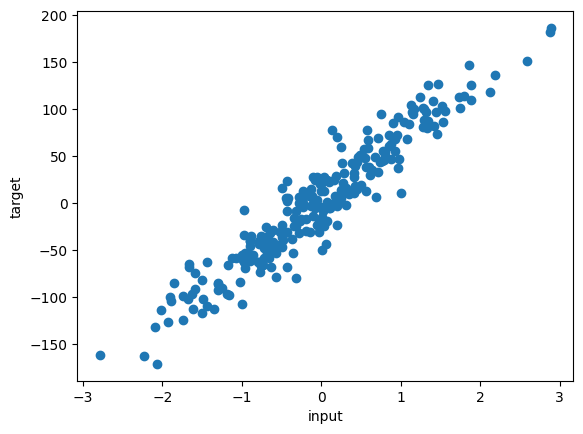

In [3]:
plt.scatter(input_,target_)
plt.xlabel('input')
plt.ylabel('target')

#### Splitting data into train and test datasets

In [4]:
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.2 , random_state = 42)

#### Applying LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)
print("Linear Regression Coefficient", lr.coef_)
print("Linear Regression Intercept", lr.intercept_)

Linear Regression Coefficient [64.22146915]
Linear Regression Intercept 2.8464640146742566


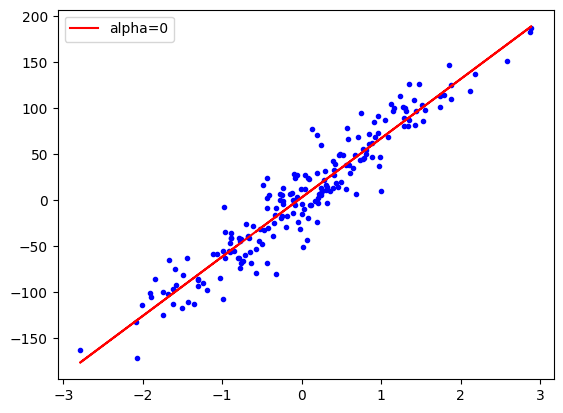

In [10]:
plt.plot(train_input, train_target,'b.')
plt.plot(train_input,lr.predict(train_input),color='red',label='alpha=0')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import r2_score

In [12]:
# Make Prediction
lr_pred = lr.predict(test_input)
print("Linear Regression R2 Score: ",r2_score(test_target,lr_pred))

Linear Regression R2 Score:  0.912486303225704


Applying Rigid Regression

In [14]:
from sklearn.linear_model import Ridge

In [15]:
rr = Ridge()
rr.fit(train_input,train_target)
print("Ridge Regression Coefficient", rr.coef_)
print("Ridge Regression Intercept", rr.intercept_)

Ridge Regression Coefficient [63.91452799]
Ridge Regression Intercept 2.8540220007223285


In [16]:
rr_pred = rr.predict(test_input)
print("Ridge Regression R2 Score: ",r2_score(test_target,rr_pred))

Ridge Regression R2 Score:  0.9119994008293832


Plotting Different Values of Regression

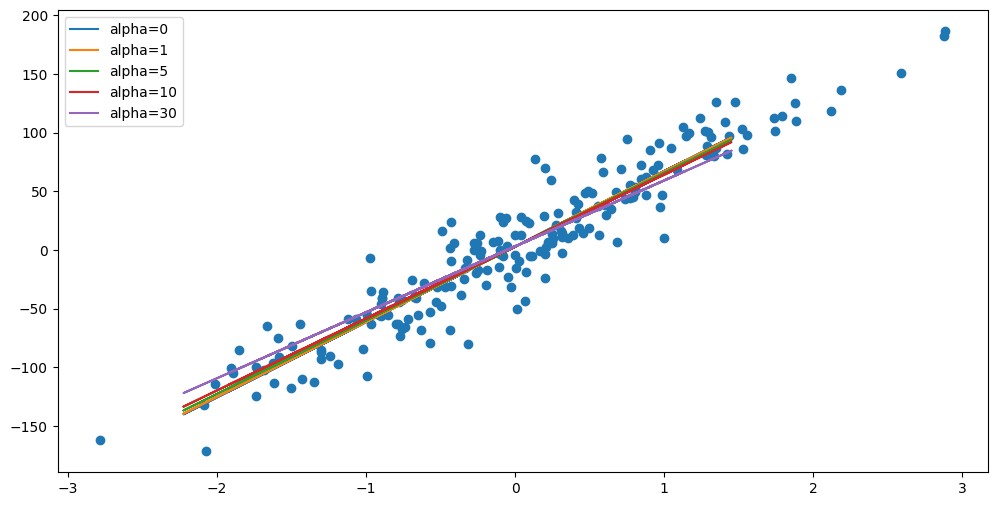

In [17]:
def plot_ridge_alphas(X_train, y_train, X_test, alphas):
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train)

    for alpha in alphas:
        rr = Ridge(alpha=alpha)
        rr.fit(X_train, y_train)
        plt.plot(X_test, rr.predict(X_test), label=f'alpha={alpha}')

    plt.legend()
    plt.show()

# Example usage:
alphas_to_plot = [0, 1, 5, 10, 30]
plot_ridge_alphas(train_input, train_target, test_input, alphas_to_plot)

Appying Lasso Regression

In [18]:
lasso = Lasso()
lasso.fit(train_input,train_target)
print("Rigid Regression Coefficient", lasso.coef_)
print("Rigid Regression Intercept", lasso.intercept_)

Rigid Regression Coefficient [63.26099532]
Rigid Regression Intercept 2.8701143060414465


In [19]:
lasso_pred = lasso.predict(test_input)
print("Ridge Regression R2 Score: ",r2_score(test_target,lasso_pred))

Ridge Regression R2 Score:  0.9108060251381048


c:\Users\daniel mensah\.conda\envs\mlproj\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\daniel mensah\.conda\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\daniel mensah\.conda\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.418e+04, tolerance: 9.472e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

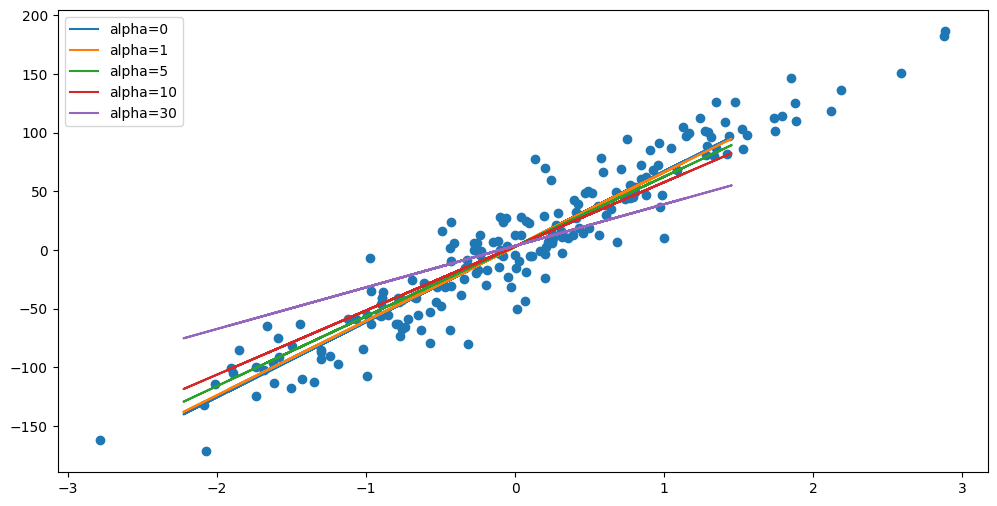

In [20]:
def plot_lasso_alphas(X_train, y_train, X_test, alphas):
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train)

    for alpha in alphas:
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train, y_train)
        plt.plot(X_test, lasso_model.predict(X_test), label=f'alpha={alpha}')

    plt.legend()
    plt.show()

# Example usage:
alphas_to_plot = [0, 1, 5, 10, 30]
plot_lasso_alphas(train_input, train_target, test_input, alphas_to_plot)

#### Lasso Regression for Non- Linear Data

Let's build a polynomial data that will represent this equation: y = 0.5x^2 + 0.9x + 2
#### Generating synthetic data with a Quadratic relationship using NumPy and randomness

In [21]:
# X values randomly generated in the range [-3, 3]
X = 6 * np.random.rand(200, 1) - 3

# Creating a quadratic relationship in the data with some noise
y = 0.5 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

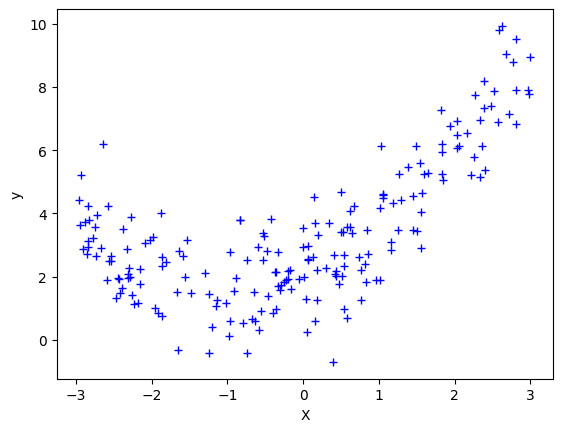

In [22]:
plt.plot(X, y,'b+')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

c:\Users\daniel mensah\.conda\envs\mlproj\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\daniel mensah\.conda\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\daniel mensah\.conda\envs\mlproj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+02, tolerance: 9.515e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

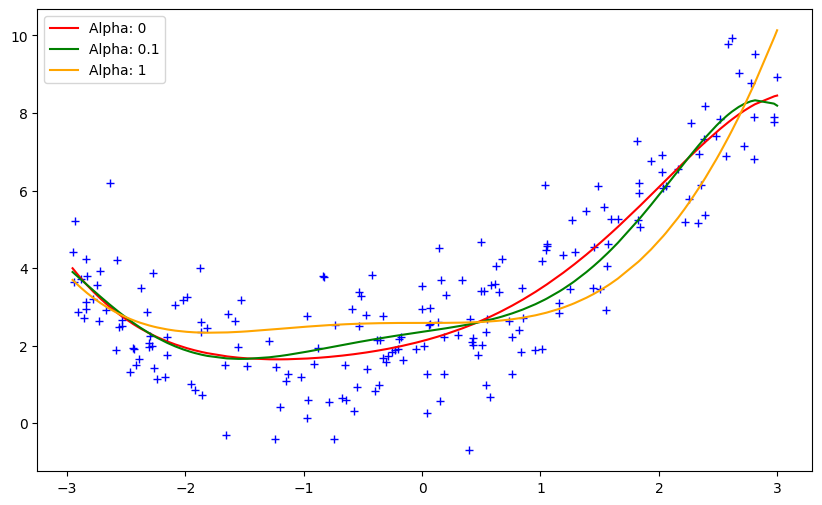

In [24]:
def get_preds_lasso(X, y, alpha):
    model = Pipeline([
        ('polynomial_features', PolynomialFeatures(degree=6)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(X, y)
    return model.predict(X)

alphas = [0, 0.1, 1]
colors = ['red', 'green', 'orange']

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b+')

for alpha, color in zip(alphas, colors):
    preds = get_preds_lasso(X, y, alpha)
    # Plot
    plt.plot(sorted(X[:, 0]), preds[np.argsort(X[:, 0])], color, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()